# Exploratory data analysis - EDA

Capstone 2 problem: What is the evolution of the impact of catastrophic events on the commercial aerial traffic in Canada, between 2001 and 2018?

In [71]:
# Importing matplotlib.pyplot, seaborn and pandas. 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np

# Defining plot style
sns.set(style='ticks')

# loading the datasets previously cleaned. 
disaster = pd.read_csv('disaster_cleaned.csv', sep=",")
airline_total = pd.read_csv('airline_total_cleaned.csv', sep=",")
airline_local = pd.read_csv('airline_local_cleaned.csv', sep=",")

### Visualization of the cleaned datasets prepared in the data wrangling step.

In [72]:
# Visualizing the cleaned disaster dataset
disaster.head()

,EVENT_CATEGORY,EVENT_SUBGROUP,EVENT_TYPE,PLACE,EVENT_START_DATE,COMMENTS,FATALITIES,INJURED_/_INFECTED,EVACUATED,ESTIMATED_TOTAL_COST,NORMALIZED_TOTAL_COST,EVENT_END_DATE,FEDERAL_DFAA_PAYMENTS,PROVINCIAL_DEPARTMENT_PAYMENTS,INSURANCE_PAYMENTS,UTILITY_-_PEOPLE_AFFECTED,year,month
0,Disaster,Meteorological - Hydrological,Storms and Severe Thunderstorms,British Columbia,2018-12-22,A powerful windstorm caused significant damage...,1.0,NaN,NaN,52765000.0,NaN,12/22/2018 12:00:00 AM,NaN,NaN,52765000.0,400000.0,2018,12
1,Disaster,Meteorological - Hydrological,Tornado,National Capital Region,2018-09-21,"On September 21st, 6 tornadoes touched down in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,9
2,Disaster,Meteorological - Hydrological,Wildfire,British Columbia,2018-08-15,British Columbia and its interior and south co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,8
3,Disaster,Meteorological - Hydrological,Flood,Toronto,2018-08-07,A severe overnight storm produced over 70 mm o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,8
4,Disaster,Meteorological - Hydrological,Storms and Severe Thunderstorms,Southern Alberta,2018-08-01,A hail storm struck Calgary on July 23rd which...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,8


In [73]:
# Visualizing the cleaned airline_total dataset
airline_total.head()

,REF_DATE,Airports,Class_of_operation,Peak_hour_and_peak_day_of_movements,VALUE,year,month
0,2001-02-01,"Total, all airports","Total, itinerant and local movements",Number of movements,335254,2001,2
1,2001-03-01,"Total, all airports","Total, itinerant and local movements",Number of movements,418483,2001,3
2,2001-04-01,"Total, all airports","Total, itinerant and local movements",Number of movements,424343,2001,4
3,2001-05-01,"Total, all airports","Total, itinerant and local movements",Number of movements,460960,2001,5
4,2001-06-01,"Total, all airports","Total, itinerant and local movements",Number of movements,465684,2001,6


In [74]:
# Visualizing the cleaned airline_local dataset
airline_local.head()

,REF_DATE,Airports,Class_of_operation,Peak_hour_and_peak_day_of_movements,VALUE,year,month
0,2001-02-01,"Abbotsford, British Columbia","Total, itinerant and local movements",Number of movements,10500,2001,2
1,2001-02-01,"Boundary Bay, British Columbia","Total, itinerant and local movements",Number of movements,17047,2001,2
2,2001-02-01,"Calgary International, Alberta","Total, itinerant and local movements",Number of movements,17753,2001,2
3,2001-02-01,"Calgary/Springbank, Alberta","Total, itinerant and local movements",Number of movements,10772,2001,2
4,2001-02-01,"Chicoutimi/St-Honoré, Quebec","Total, itinerant and local movements",Number of movements,2198,2001,2


### Focus on the disaster dataset exploration.

In [75]:
# Visualizing the cleaned disaster dataset parameters
disaster.describe().T

# This is useful only if we were to consider the quantitative features of this dataset
# (e.g. the fatalities or the cost associated with the disaster events).

,count,mean,std,min,25%,50%,75%,max
FATALITIES,158.0,5.126582e+00,4.240474e+01,0.0,0.00,0.0,0.000000e+00,4.550000e+02
INJURED_/_INFECTED,141.0,1.872340e+00,1.114633e+01,0.0,0.00,0.0,0.000000e+00,1.000000e+02
EVACUATED,164.0,2.265878e+03,1.083299e+04,0.0,0.00,269.0,1.000000e+03,1.000000e+05
ESTIMATED_TOTAL_COST,196.0,7.877261e+07,3.697527e+08,0.0,0.00,0.0,1.805200e+07,4.068678e+09
NORMALIZED_TOTAL_COST,190.0,3.861121e+06,1.793540e+07,0.0,0.00,0.0,8.806147e+05,1.901251e+08
FEDERAL_DFAA_PAYMENTS,54.0,5.960103e+07,1.749608e+08,0.0,1527811.00,8165152.0,2.476300e+07,1.015742e+09
PROVINCIAL_DEPARTMENT_PAYMENTS,12.0,6.184578e+07,1.108597e+08,19779.0,601707.25,1150000.0,5.908750e+07,3.000000e+08
INSURANCE_PAYMENTS,43.0,2.676996e+08,6.015945e+08,123864.0,36940000.00,96183000.0,1.731560e+08,3.600000e+09
UTILITY_-_PEOPLE_AFFECTED,142.0,5.388795e+04,1.687647e+05,0.0,0.00,0.0,4.500000e+03,1.500000e+06
year,229.0,2.009808e+03,4.623332e+00,2001.0,2007.00,2009.0,2.014000e+03,2.018000e+03


In [76]:
# Verification of the different value in the event_subgroup column.
disaster['EVENT_SUBGROUP'].unique()

# This column contains 2 categorical values: Meterological/hydrological and geological.

array(['Meteorological - Hydrological', 'Geological'], dtype=object)

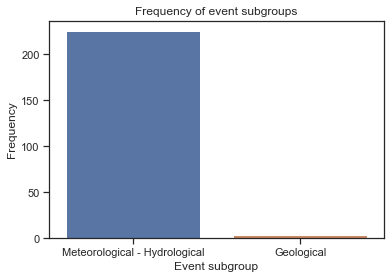

Meteorological - Hydrological    225
Geological                         4
Name: EVENT_SUBGROUP, dtype: int64

In [77]:
# Verification of the proportion between the 2 categories.
sns.countplot(data=disaster, x='EVENT_SUBGROUP')
plt.xlabel('Event subgroup')
plt.ylabel('Frequency')
plt.title('Frequency of event subgroups')
plt.show()

disaster['EVENT_SUBGROUP'].value_counts()

# By far, meterological/hydrological event subgroup is the more common in the recorded disasters.

In [78]:
# Verification of the different value in the event_type column.
disaster['EVENT_TYPE'].unique()

# This column contain 13 different categorical values.

array(['Storms and Severe Thunderstorms', 'Tornado', 'Wildfire', 'Flood',
       'Heat Event', 'Storm - Unspecified / Other', 'Winter Storm',
       'Landslide', 'Hurricane / Typhoon / Tropical Storm', 'Earthquake',
       'Drought', 'Avalanche', 'Storm Surge'], dtype=object)

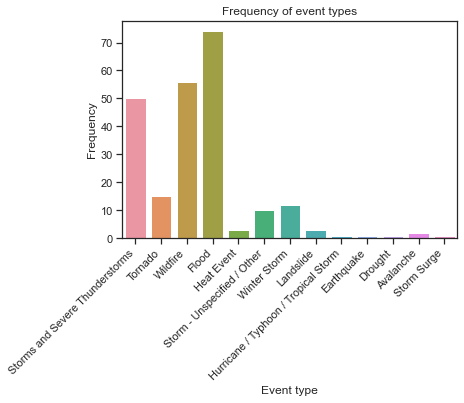

Flood                                   74
Wildfire                                56
Storms and Severe Thunderstorms         50
Tornado                                 15
Winter Storm                            12
Storm - Unspecified / Other             10
Heat Event                               3
Landslide                                3
Avalanche                                2
Hurricane / Typhoon / Tropical Storm     1
Earthquake                               1
Drought                                  1
Storm Surge                              1
Name: EVENT_TYPE, dtype: int64

In [79]:
# Verification of the proportion between the 13 categories.
sns.countplot(data=disaster, x='EVENT_TYPE')
plt.xlabel('Event type')
plt.ylabel('Frequency')
plt.title('Frequency of event types')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

disaster['EVENT_TYPE'].value_counts()

# Flooding events are the most common, followed by wildfire and storms/severe thumderstorms.

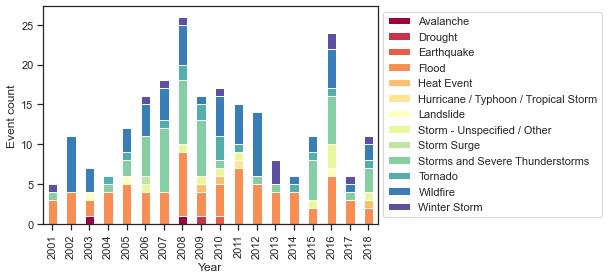

In [80]:
# Verification of annual occurrence of each event type.
disaster_yearly = disaster.groupby(['year', 'EVENT_TYPE'])['year'].count().unstack('EVENT_TYPE').fillna(0)

cmap = cm.get_cmap('Spectral')

disaster_yearly.plot(kind='bar', stacked=True, cmap=cmap)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Event count')
plt.xlabel('Year')
plt.show()

# We can see that 2008 and 2016 were particularly affected by natural disaster.
# We can see that flooding events are appening each year.
# We can see that wildfire are also common events.

In [81]:
# Verification of the local distribution of the disasters. 
print(disaster['PLACE'].unique())
print('Number of different locations:', disaster['PLACE'].nunique())

# There is 183 different localities affected by natural disaster between 2001 and 2018. 
# The difficulty with this information is in the range of the area covered,
# sometime being the entire province, a zone or a city (e.g. 'British Columbia', 'Southern Ontario' or 'Toronto').

['British Columbia' 'National Capital Region' 'Toronto' 'Southern Alberta'
 'Ontario' 'Quebec' 'Southern Manitoba' 'Southern Ontario'
 'Grand River, ON' 'Windsor, Ontario' 'Saskatoon' 'Eastern Canada'
 'Churchill, Manitoba' 'Red Earth First Nation SK'
 'South Coast and Lower Mainland British Columbia'
 'Windsor and Tecumseh ON' 'West Kelowna BC' 'Fort McMurray AB'
 'Long Plain First Nation MB' 'Prairie Provinces'
 'Alberta and Saskatchewan' 'Burns Bog BC' 'Kenora ON'
 'Alberta, Saskatchewan, Manitoba and Ontario'
 'Easterville and Chemawawin MB' 'Northeastern British Columbia'
 'Kashechewan First Nation ON' 'Paul First Nation, AB' 'Horton ON'
 'Ontario, Quebec, New Brunswick, Nove Scotia, Prince Edward Island and Newfoundland'
 'Lower Mainland British Columbia' 'Chestermere AB'
 'Northern Saskatchewan' 'Fort Albany and Kashcewan First Nation'
 'Southern Saskatchewan' 'Angus, Ontario' 'Southern Quebec' 'Qu?bec'
 'Toronto ON' 'Southeast British Columbia'
 'Kasabonika Lake First Nation ON

In [82]:
# Associating manually each location event to a province or territory to make possible a geographical analysis.
disaster['prov_ter'] = ""
disaster.loc[disaster['PLACE'].str.contains('British Columbia'), 'prov_ter'] = 'BC'
disaster.loc[disaster['PLACE'].str.contains('BC'), 'prov_ter'] = 'BC'
disaster.loc[disaster['PLACE'].str.contains('Alberta'), 'prov_ter'] = 'AB'
disaster.loc[disaster['PLACE'].str.contains('AB'), 'prov_ter'] = 'AB'
disaster.loc[disaster['PLACE'].str.contains('Saskatoon'), 'prov_ter'] = 'SK'
disaster.loc[disaster['PLACE'].str.contains('Saskatchewan'), 'prov_ter'] = 'SK'
disaster.loc[disaster['PLACE'].str.contains('SK'), 'prov_ter'] = 'SK'
disaster.loc[disaster['PLACE'].str.contains('Manitoba'), 'prov_ter'] = 'MB'
disaster.loc[disaster['PLACE'].str.contains('MB'), 'prov_ter'] = 'MB'
disaster.loc[disaster['PLACE'].str.contains('National Capital Region'), 'prov_ter'] = 'ON'
disaster.loc[disaster['PLACE'].str.contains('Toronto'), 'prov_ter'] = 'ON'
disaster.loc[disaster['PLACE'].str.contains('Ontario'), 'prov_ter'] = 'ON'
disaster.loc[disaster['PLACE'].str.contains('ON'), 'prov_ter'] = 'ON'
disaster.loc[disaster['PLACE'].str.contains('Fort Albany and Kashcewan First Nation'), 'prov_ter'] = 'ON'
disaster.loc[disaster['PLACE'].str.contains('Qu'), 'prov_ter'] = 'QC'
disaster.loc[disaster['PLACE'].str.contains('QC'), 'prov_ter'] = 'QC'

In [83]:
# Dealing with the events that took place in multiple provinces:
# Duplicating the event for each province where it appends.
# ('Eastern Canada', 'Prairie Provinces', 'Alberta and Saskatchewan', 'Alberta, Saskatchewan, Manitoba and Ontario',
# 'Ontario, Quebec, New Brunswick, Nove Scotia, Prince Edward Island and Newfoundland',
# 'Yukon, Northwest Territories and British Columbia',
# 'Quebec, New Brunswick, Nova Scotia, Prince Eward Island, and Newfoundland and Labrador', 'Saskatchewan and Alberta',
# 'Quebec and New Brunswick', 'Western Canada')
disaster.loc[229] = ['Disaster', 'Meteorological - Hydrological', 'Flood', 'Eastern Canada', '2017-05-04', 'A combination of significant rainfall from May...', 2.0, 'NaN', 4000.0, 116000000.0, 'NaN', '05/07/17 00:00', 'NaN', 'NaN', 116000000.0, 'NaN', 2017, 5, 'ON']
disaster.loc[230] = ['Disaster', 'Meteorological - Hydrological', 'Flood', 'Eastern Canada', '2017-05-04', 'A combination of significant rainfall from May...', 2.0, 'NaN', 4000.0, 116000000.0, 'NaN', '05/07/17 00:00', 'NaN', 'NaN', 116000000.0, 'NaN', 2017, 5, 'QC']
disaster.loc[231] = ['Disaster', 'Meteorological - Hydrological', 'Flood', 'Eastern Canada', '2017-05-04', 'A combination of significant rainfall from May...', 2.0, 'NaN', 4000.0, 116000000.0, 'NaN', '05/07/17 00:00', 'NaN', 'NaN', 116000000.0, 'NaN', 2017, 5, 'NB']
disaster.loc[232] = ['Disaster', 'Meteorological - Hydrological', 'Flood', 'Eastern Canada', '2017-05-04', 'A combination of significant rainfall from May...', 2.0, 'NaN', 4000.0, 116000000.0, 'NaN', '05/07/17 00:00', 'NaN', 'NaN', 116000000.0, 'NaN', 2017, 5, 'NS']
disaster.loc[233] = ['Disaster', 'Meteorological - Hydrological', 'Flood', 'Eastern Canada', '2017-05-04', 'A combination of significant rainfall from May...', 2.0, 'NaN', 4000.0, 116000000.0, 'NaN', '05/07/17 00:00', 'NaN', 'NaN', 116000000.0, 'NaN', 2017, 5, 'IPE']
disaster.loc[234] = ['Disaster', 'Meteorological - Hydrological', 'Flood', 'Eastern Canada', '2017-05-04', 'A combination of significant rainfall from May...', 2.0, 'NaN', 4000.0, 116000000.0, 'NaN', '05/07/17 00:00', 'NaN', 'NaN', 116000000.0, 'NaN', 2017, 5, 'NFL']

disaster.loc[235] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Prairie Provinces', '2016-07-18', 'Prairie Provinces, July 18-20, 2016. Southern ...', 'NaN', 'NaN', 'NaN', 102739000.0, 4800887.9, '7/20/2016 12:00:00 AM', 'NaN', 'NaN', 102739000.0, 'NaN', 2016, 7, 'AB']
disaster.loc[236] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Prairie Provinces', '2016-07-18', 'Prairie Provinces, July 18-20, 2016. Southern ...', 'NaN', 'NaN', 'NaN', 102739000.0, 4800887.9, '7/20/2016 12:00:00 AM', 'NaN', 'NaN', 102739000.0, 'NaN', 2016, 7, 'SK']
disaster.loc[237] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Prairie Provinces', '2016-07-18', 'Prairie Provinces, July 18-20, 2016. Southern ...', 'NaN', 'NaN', 'NaN', 102739000.0, 4800887.9, '7/20/2016 12:00:00 AM', 'NaN', 'NaN', 102739000.0, 'NaN', 2016, 7, 'MB']

disaster.loc[238] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Prairie Provinces', '2016-07-08', 'Prairie Provinces, July 8-11, 2016. Severe sto...', 'NaN', 'NaN', 'NaN', 54252000.0, 2535140.2, '07/11/16 00:00', 'NaN', 'NaN', 54252000.0, 'NaN', 2016, 7, 'AB']
disaster.loc[239] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Prairie Provinces', '2016-07-08', 'Prairie Provinces, July 8-11, 2016. Severe sto...', 'NaN', 'NaN', 'NaN', 54252000.0, 2535140.2, '07/11/16 00:00', 'NaN', 'NaN', 54252000.0, 'NaN', 2016, 7, 'SK']
disaster.loc[240] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Prairie Provinces', '2016-07-08', 'Prairie Provinces, July 8-11, 2016. Severe sto...', 'NaN', 'NaN', 'NaN', 54252000.0, 2535140.2, '07/11/16 00:00', 'NaN', 'NaN', 54252000.0, 'NaN', 2016, 7, 'MB']

disaster.loc[241] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Prairie Provinces', '2016-06-28', 'Prairie Provinces, June 28-30, 2016. Multiple ...', 'NaN', 'NaN', 'NaN', 89083000.0, 4162757.0, '6/30/2016 12:00:00 AM	', 'NaN', 'NaN', 89083000.0, 'NaN', 2016, 6, 'AB']
disaster.loc[242] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Prairie Provinces', '2016-06-28', 'Prairie Provinces, June 28-30, 2016. Multiple ...', 'NaN', 'NaN', 'NaN', 89083000.0, 4162757.0, '6/30/2016 12:00:00 AM	', 'NaN', 'NaN', 89083000.0, 'NaN', 2016, 6, 'SK']
disaster.loc[243] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Prairie Provinces', '2016-06-28', 'Prairie Provinces, June 28-30, 2016. Multiple ...', 'NaN', 'NaN', 'NaN', 89083000.0, 4162757.0, '6/30/2016 12:00:00 AM	', 'NaN', 'NaN', 89083000.0, 'NaN', 2016, 6, 'MB']

disaster.loc[244] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Prairie Provinces', '2015-06-12', 'June 12, 2015. A massive st...', 'NaN', 'NaN', 'NaN', 98184000.0, 4653270.1, '6/12/15 00:00', 'NaN', 'NaN', 98184000.0, 9000.0, 2015, 6, 'AB']
disaster.loc[245] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Prairie Provinces', '2015-06-12', 'June 12, 2015. A massive st...', 'NaN', 'NaN', 'NaN', 98184000.0, 4653270.1, '6/12/15 00:00', 'NaN', 'NaN', 98184000.0, 9000.0, 2015, 6, 'SK']
disaster.loc[246] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Prairie Provinces', '2015-06-12', 'June 12, 2015. A massive st...', 'NaN', 'NaN', 'NaN', 98184000.0, 4653270.1, '6/12/15 00:00', 'NaN', 'NaN', 98184000.0, 9000.0, 2015, 6, 'MB']

disaster.loc[247] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Alberta and Saskatchewan', '2016-07-15', 'Alberta and Saskatchewan, July 15-16, 2016. A ...', 'NaN', 'NaN', 'NaN', 70468000.0, 3292897.2, '7/16/2016 12:00:00 AM', 'NaN', 'NaN', 70468000.0, 'NaN', 2016, 7, 'AB']
disaster.loc[248] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Alberta and Saskatchewan', '2016-07-15', 'Alberta and Saskatchewan, July 15-16, 2016. A ...', 'NaN', 'NaN', 'NaN', 70468000.0, 3292897.2, '7/16/2016 12:00:00 AM', 'NaN', 'NaN', 70468000.0, 'NaN', 2016, 7, 'SK']

disaster.loc[249] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Alberta and Saskatchewan', '2015-07-22', 'Alberta and Saskatchewan, July 22, 2015. Sever...', 'NaN', 'NaN', 'NaN', 45676000.0, 2164739.3, '7/22/2015 12:00:00 AM', 'NaN', 'NaN', 45676000.0, 'NaN', 2015, 7, 'AB']
disaster.loc[250] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Alberta and Saskatchewan', '2015-07-22', 'Alberta and Saskatchewan, July 22, 2015. Sever...', 'NaN', 'NaN', 'NaN', 45676000.0, 2164739.3, '7/22/2015 12:00:00 AM', 'NaN', 'NaN', 45676000.0, 'NaN', 2015, 7, 'SK']

disaster.loc[251] = ['Disaster', 'Meteorological - Hydrological', 'Winter Storm', 'Ontario, Quebec, New Brunswick, Nove Scotia, Prince Edward Island and Newfoundland', '2016-02-24', 'Ontario, Quebec, New Brunswick, Nove Scotia, P...', 'NaN', 'NaN', 200.0, 0, 0, '2/26/2016 12:00:00 AM', 'NaN', 'NaN', 750000.0, 'NaN', 2016, 2, 'ON']
disaster.loc[252] = ['Disaster', 'Meteorological - Hydrological', 'Winter Storm', 'Ontario, Quebec, New Brunswick, Nove Scotia, Prince Edward Island and Newfoundland', '2016-02-24', 'Ontario, Quebec, New Brunswick, Nove Scotia, P...', 'NaN', 'NaN', 200.0, 0, 0, '2/26/2016 12:00:00 AM', 'NaN', 'NaN', 750000.0, 'NaN', 2016, 2, 'QC']
disaster.loc[253] = ['Disaster', 'Meteorological - Hydrological', 'Winter Storm', 'Ontario, Quebec, New Brunswick, Nove Scotia, Prince Edward Island and Newfoundland', '2016-02-24', 'Ontario, Quebec, New Brunswick, Nove Scotia, P...', 'NaN', 'NaN', 200.0, 0, 0, '2/26/2016 12:00:00 AM', 'NaN', 'NaN', 750000.0, 'NaN', 2016, 2, 'NB']
disaster.loc[254] = ['Disaster', 'Meteorological - Hydrological', 'Winter Storm', 'Ontario, Quebec, New Brunswick, Nove Scotia, Prince Edward Island and Newfoundland', '2016-02-24', 'Ontario, Quebec, New Brunswick, Nove Scotia, P...', 'NaN', 'NaN', 200.0, 0, 0, '2/26/2016 12:00:00 AM', 'NaN', 'NaN', 750000.0, 'NaN', 2016, 2, 'NS']
disaster.loc[255] = ['Disaster', 'Meteorological - Hydrological', 'Winter Storm', 'Ontario, Quebec, New Brunswick, Nove Scotia, Prince Edward Island and Newfoundland', '2016-02-24', 'Ontario, Quebec, New Brunswick, Nove Scotia, P...', 'NaN', 'NaN', 200.0, 0, 0, '2/26/2016 12:00:00 AM', 'NaN', 'NaN', 750000.0, 'NaN', 2016, 2, 'IPE']
disaster.loc[256] = ['Disaster', 'Meteorological - Hydrological', 'Winter Storm', 'Ontario, Quebec, New Brunswick, Nove Scotia, Prince Edward Island and Newfoundland', '2016-02-24', 'Ontario, Quebec, New Brunswick, Nove Scotia, P...', 'NaN', 'NaN', 200.0, 0, 0, '2/26/2016 12:00:00 AM', 'NaN', 'NaN', 750000.0, 'NaN', 2016, 2, 'NFL']

disaster.loc[257] = ['Disaster', 'Meteorological - Hydrological', 'Flood', 'Yukon, Northwest Territories and British Columbia', '2012-06-06', 'Yukon, Northwest Territories and British Colum...', 0, 0, 137.0, 1503748.0, 74137.1, '6/30/2012 12:00:00 AM', 1503748.0, 'NaN', 'NaN', 'NaN', 2012, 6, 'YK']
disaster.loc[258] = ['Disaster', 'Meteorological - Hydrological', 'Flood', 'Yukon, Northwest Territories and British Columbia', '2012-06-06', 'Yukon, Northwest Territories and British Colum...', 0, 0, 137.0, 1503748.0, 74137.1, '6/30/2012 12:00:00 AM', 1503748.0, 'NaN', 'NaN', 'NaN', 2012, 6, 'NWT']
disaster.loc[259] = ['Disaster', 'Meteorological - Hydrological', 'Flood', 'Yukon, Northwest Territories and British Columbia', '2012-06-06', 'Yukon, Northwest Territories and British Colum...', 0, 0, 137.0, 1503748.0, 74137.1, '6/30/2012 12:00:00 AM', 1503748.0, 'NaN', 'NaN', 'NaN', 2012, 6, 'BC']

disaster.loc[260] = ['Disaster', 'Meteorological - Hydrological', 'Hurricane / Typhoon / Tropical Storm', 'Quebec, New Brunswick, Nova Scotia, Prince Eward Island, and Newfoundland and Labrador', '2011-08-28', 'Quebec, New Brunswick, Nova Scotia, Prince Edw...','NaN' ,'NaN' ,'NaN' ,'NaN' ,'NaN' ,'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 2011, 8, 'QC']
disaster.loc[261] = ['Disaster', 'Meteorological - Hydrological', 'Hurricane / Typhoon / Tropical Storm', 'Quebec, New Brunswick, Nova Scotia, Prince Eward Island, and Newfoundland and Labrador', '2011-08-28', 'Quebec, New Brunswick, Nova Scotia, Prince Edw...','NaN' ,'NaN' ,'NaN' ,'NaN' ,'NaN' ,'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 2011, 8, 'NB']
disaster.loc[262] = ['Disaster', 'Meteorological - Hydrological', 'Hurricane / Typhoon / Tropical Storm', 'Quebec, New Brunswick, Nova Scotia, Prince Eward Island, and Newfoundland and Labrador', '2011-08-28', 'Quebec, New Brunswick, Nova Scotia, Prince Edw...','NaN' ,'NaN' ,'NaN' ,'NaN' ,'NaN' ,'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 2011, 8, 'NS']
disaster.loc[263] = ['Disaster', 'Meteorological - Hydrological', 'Hurricane / Typhoon / Tropical Storm', 'Quebec, New Brunswick, Nova Scotia, Prince Eward Island, and Newfoundland and Labrador', '2011-08-28', 'Quebec, New Brunswick, Nova Scotia, Prince Edw...','NaN' ,'NaN' ,'NaN' ,'NaN' ,'NaN' ,'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 2011, 8, 'IPE']
disaster.loc[264] = ['Disaster', 'Meteorological - Hydrological', 'Hurricane / Typhoon / Tropical Storm', 'Quebec, New Brunswick, Nova Scotia, Prince Eward Island, and Newfoundland and Labrador', '2011-08-28', 'Quebec, New Brunswick, Nova Scotia, Prince Edw...','NaN' ,'NaN' ,'NaN' ,'NaN' ,'NaN' ,'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 2011, 8, 'NFL']

disaster.loc[265] = ['Disaster', 'Meteorological - Hydrological', 'Drought', 'Saskatchewan and Alberta', '2009-03-01', 'Saskatchewan and Alberta, March 1 to July 1, 2...', 0 ,0 ,0 ,0 ,0 ,'07/01/09 00:00', 'NaN', 'NaN', 'NaN', 0, 2009, 3 , 'SK']
disaster.loc[266] = ['Disaster', 'Meteorological - Hydrological', 'Drought', 'Saskatchewan and Alberta', '2009-03-01', 'Saskatchewan and Alberta, March 1 to July 1, 2...', 0 ,0 ,0 ,0 ,0 ,'07/01/09 00:00', 'NaN', 'NaN', 'NaN', 0, 2009, 3 , 'AB']

disaster.loc[267] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Quebec and New Brunswick', '2008-07-31', 'Quebec and New Brunswick, July 31 to August 4,...', 2.0 ,0 ,74.0 ,1499116.0 ,78831.7, '08/04/08 00:00', '1499116.0', 'NaN', 'NaN', 0, 2008, 7 , 'QC']
disaster.loc[268] = ['Disaster', 'Meteorological - Hydrological', 'Storms and Severe Thunderstorms', 'Quebec and New Brunswick', '2008-07-31', 'Quebec and New Brunswick, July 31 to August 4,...', 2.0 ,0 ,74.0 ,1499116.0 ,78831.7, '08/04/08 00:00', '1499116.0', 'NaN', 'NaN', 0, 2008, 7 , 'NB']
                    
disaster.loc[269] = ['Disaster', 'Meteorological - Hydrological', 'Avalanche', 'Western Canada', '2003-01-21', 'Golden, Fernie, Valemount, Nelson, Revelstoke,...', 30.0 ,'NaN', 2.0, 'NaN', 'NaN', '1/21/2003 12:00:00 AM', 'NaN', 'NaN', 'NaN', 0, 2003, 1 , 'BC']
disaster.loc[269] = ['Disaster', 'Meteorological - Hydrological', 'Avalanche', 'Western Canada', '2003-01-21', 'Golden, Fernie, Valemount, Nelson, Revelstoke,...', 30.0 ,'NaN', 2.0, 'NaN', 'NaN', '1/21/2003 12:00:00 AM', 'NaN', 'NaN', 'NaN', 0, 2003, 1 , 'AB']
disaster.loc[269] = ['Disaster', 'Meteorological - Hydrological', 'Avalanche', 'Western Canada', '2003-01-21', 'Golden, Fernie, Valemount, Nelson, Revelstoke,...', 30.0 ,'NaN', 2.0, 'NaN', 'NaN', '1/21/2003 12:00:00 AM', 'NaN', 'NaN', 'NaN', 0, 2003, 1 , 'SK']
disaster.loc[269] = ['Disaster', 'Meteorological - Hydrological', 'Avalanche', 'Western Canada', '2003-01-21', 'Golden, Fernie, Valemount, Nelson, Revelstoke,...', 30.0 ,'NaN', 2.0, 'NaN', 'NaN', '1/21/2003 12:00:00 AM', 'NaN', 'NaN', 'NaN', 0, 2003, 1 , 'MB']

In [84]:
# Removing the original rows that were duplicated.
disaster = disaster[disaster['prov_ter'] != '']

# Verification thant there is no more empty values.
print(disaster['prov_ter'].unique())

['BC' 'ON' 'AB' 'QC' 'MB' 'SK' 'NB' 'NS' 'IPE' 'NFL' 'YK' 'NWT']


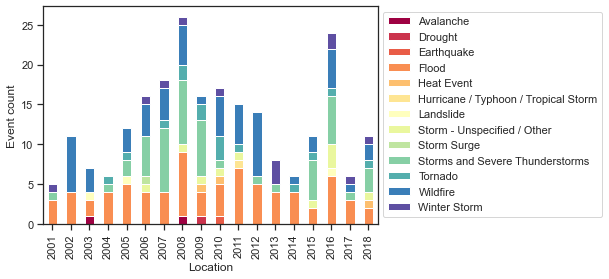

In [85]:
# Verification of geographical distribution of each event type.
disaster_provter = disaster.groupby(['prov_ter', 'EVENT_TYPE'])['prov_ter'].count().unstack('EVENT_TYPE').fillna(0)

cmap = cm.get_cmap('Spectral')

disaster_yearly.plot(kind='bar', stacked=True, cmap=cmap)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Event count')
plt.xlabel('Location')
plt.show()

# We can see that most event are happening in the most populated provinces and this may be due to a bias in data logging.

In [102]:
disaster_2 = disaster.groupby(['year', 'month', 'EVENT_TYPE', 'prov_ter'])['year'].count().unstack('EVENT_TYPE').fillna(0).reset_index()
disaster_2

EVENT_TYPE,year,month,prov_ter,Avalanche,Drought,Earthquake,Flood,Heat Event,Hurricane / Typhoon / Tropical Storm,Landslide,Storm - Unspecified / Other,Storm Surge,Storms and Severe Thunderstorms,Tornado,Wildfire,Winter Storm
0,2001,2,QC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2001,4,MB,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2001,6,BC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2001,7,BC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2001,7,ON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2018,8,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
212,2018,8,BC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
213,2018,8,ON,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,2018,9,ON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Focus on the airline_total dataset.

In [103]:
# Visualizing the cleaned airline_total dataset parameters
airline_total.describe().T

# Only the "VALUE" row is pertinent here.

,count,mean,std,min,25%,50%,75%,max
VALUE,215.0,380265.637209,57661.016470,259238.0,338657.0,390620.0,419803.0,507708.0
year,215.0,2009.539535,5.179675,2001.0,2005.0,2010.0,2014.0,2018.0
month,215.0,6.525581,3.447611,1.0,4.0,7.0,9.5,12.0


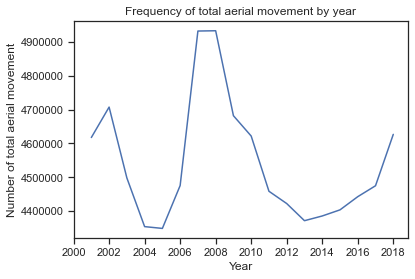

In [104]:
# Verification of annual frequence of total aerial momvement yearly
airline_total_sum  = airline_total.groupby(['year']).sum()

sns.lineplot(x="year", y="VALUE", data=airline_total_sum)
plt.xlabel('Year')
plt.ylabel('Number of total aerial movement')
plt.title('Frequency of total aerial movement by year')
plt.xticks(np.arange(2000, 2019, step=2))
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.show()

# We can see that there is a major decrease in the number of air flight between 2001 (the first year considered) and 2006.
# There is then a peak in the number of flight between 2007 and 2008, and then a subsequent decrease.
# In fact, we can see that the shape of the curve is very similar to the disaster occurence.
# We can then doubt about the impact of disater on the aerial traffic in Canada.

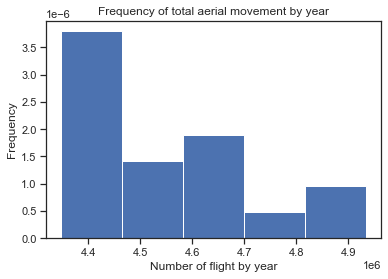

In [105]:
# Verification of the distribution of the annual sum of aerial movement in Canada
plt.hist(x = airline_total_sum['VALUE'], density=True, bins=5)
plt.xlabel('Number of flight by year')
plt.ylabel('Frequency')
plt.title('Frequency of total aerial movement by year')
plt.show()

# We can see that the distribution of the number of flights by year is highly skewed toward high values.
# This histrogram could be considered as biased because of the low number of value considered (yearly between 2001 and 2018).

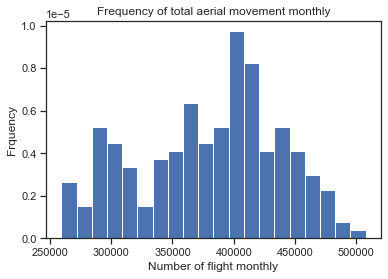

In [106]:
# Verification of the distribution of the monthly sum of aerial movement in Canada
plt.hist(x = airline_total['VALUE'], density=True, bins=20)
plt.xlabel('Number of flight monthly')
plt.ylabel('Frquency')
plt.title('Frequency of total aerial movement monthly')
plt.show()

# We can see that the distribution of the number of flights by month over the same period (2001-2018) is bimodal.

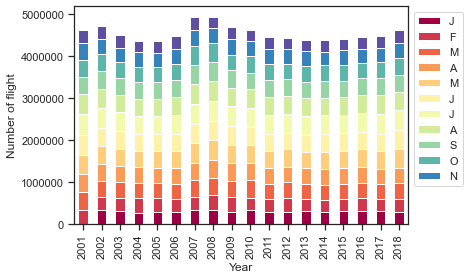

In [107]:
# Verification of the distribution of the number of flight by month for each year.
airline_total2 = airline_total.groupby(['month', 'year'])['VALUE'].sum().unstack('month')

cmap = cm.get_cmap('Spectral')

airline_total2.plot(kind='bar', stacked=True, cmap=cmap)
plt.legend('JFMAMJJASON', bbox_to_anchor=(1, 1))
plt.ylabel('Number of flight')
plt.xlabel('Year')
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.show()

# There is not much difference between the number of flight for each month of the time period.
# The increase, when there is, is diffused throughout the month.

### Focus on the airline_local dataset.

In [108]:
# Visualizing the cleaned airline_local dataset parameters
airline_local.describe().T

# Only the "VALUE" row is pertinent here.

,count,mean,std,min,25%,50%,75%,max
VALUE,8965.0,9119.588622,6824.345723,382.0,4476.0,7270.0,11435.0,43962.0
year,8965.0,2009.485332,5.167620,2001.0,2005.0,2009.0,2014.0,2018.0
month,8965.0,6.523592,3.439868,1.0,4.0,7.0,10.0,12.0


In [109]:
# Verification of the local distribution of the airports. 
print(airline_local['Airports'].unique())
print('Number of different Airports:', airline_local['Airports'].nunique())

# There is 45 different airports contributing to the total aerial movement in the country.

['Abbotsford, British Columbia' 'Boundary Bay, British Columbia'
 'Calgary International, Alberta' 'Calgary/Springbank, Alberta'
 'Chicoutimi/St-Honoré, Quebec' 'Edmonton City Centre, Alberta'
 'Edmonton International, Alberta' 'Edmonton/Villeneuve, Alberta'
 'Gander International, Newfoundland and Labrador'
 'Halifax/Robert L. Stanfield International, Nova Scotia'
 'Hamilton, Ontario' 'Kelowna, British Columbia'
 'Kitchener/Waterloo, Ontario' 'Langley, British Columbia'
 'London, Ontario' 'Moncton/Greater Moncton International, New Brunswick'
 'Montréal/Mirabel International, Quebec'
 'Montréal/Pierre Elliott Trudeau International, Quebec'
 'Montréal/St-Hubert, Quebec' 'Oshawa, Ontario'
 'Ottawa/Macdonald-Cartier International, Ontario'
 'Pitt Meadows, British Columbia' 'Prince George, British Columbia'
 'Québec/Jean Lesage International, Quebec'
 'Regina International, Saskatchewan'
 'Saskatoon/John G. Diefenbaker International, Saskatchewan'
 'Sault Ste. Marie, Ontario' 'Sept-Îles, 

In [110]:
# Verification that all the airports are contained in the 13 provinces and territories in Canada
BC = airline_local.Airports.str.contains(r'British Columbia').sum()
AL = airline_local.Airports.str.contains(r'Alberta').sum()
SA = airline_local.Airports.str.contains(r'Saskatchewan').sum()
MA = airline_local.Airports.str.contains(r'Manitoba').sum()
ON = airline_local.Airports.str.contains(r'Ontario').sum()
QC = airline_local.Airports.str.contains(r'Quebec').sum()
NB = airline_local.Airports.str.contains(r'New Brunswick').sum()
NS = airline_local.Airports.str.contains(r'Nova Scotia').sum()
NFL = airline_local.Airports.str.contains(r'Newfoundland and Labrador').sum()
IPE = airline_local.Airports.str.contains(r'Prince Edouard Island').sum()
YU = airline_local.Airports.str.contains(r'Yukon').sum()
NWT = airline_local.Airports.str.contains(r'Northwest Territories').sum()
NU = airline_local.Airports.str.contains(r'Nunavut').sum()

BC + AL + SA + MA + ON + QC + NB + NS + NFL + YU + NWT + NU == airline_local['Airports'].count()

# They are!

True

In [111]:
# Associating each airports to a province or a territory in a new column (prov_ter).
airline_local['prov_ter'] = ""
airline_local.loc[airline_local['Airports'].str.contains('British Columbia'), 'prov_ter'] = 'BC'
airline_local.loc[airline_local['Airports'].str.contains('Alberta'), 'prov_ter'] = 'AB'
airline_local.loc[airline_local['Airports'].str.contains('Saskatchewan'), 'prov_ter'] = 'SK'
airline_local.loc[airline_local['Airports'].str.contains('Manitoba'), 'prov_ter'] = 'MB'
airline_local.loc[airline_local['Airports'].str.contains('Ontario'), 'prov_ter'] = 'ON'
airline_local.loc[airline_local['Airports'].str.contains('Quebec'), 'prov_ter'] = 'QC'
airline_local.loc[airline_local['Airports'].str.contains('New Brunswick'), 'prov_ter'] = 'NB'
airline_local.loc[airline_local['Airports'].str.contains('Nova Scotia'), 'prov_ter'] = 'NS'
airline_local.loc[airline_local['Airports'].str.contains('Newfoundland and Labrador'), 'prov_ter'] = 'NFL'
airline_local.loc[airline_local['Airports'].str.contains('Prince Edouard Island'), 'prov_ter'] = 'IPE'
airline_local.loc[airline_local['Airports'].str.contains('Yukon'), 'prov_ter'] = 'YU'
airline_local.loc[airline_local['Airports'].str.contains('Northwest Territories'), 'prov_ter'] = 'NWT'
airline_local.loc[airline_local['Airports'].str.contains('Nunavut'), 'prov_ter'] = 'NU'

# Verification thant there is no empty values.
print(airline_local['prov_ter'].unique())

['BC' 'AB' 'QC' 'NFL' 'NS' 'ON' 'NB' 'SK' 'YU' 'MB' 'NWT']


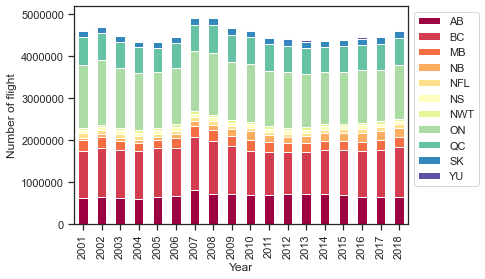

In [112]:
# Verification of the distribution of the number of flight by province or territory for each year.
airline_local2 = airline_local.groupby(['prov_ter', 'year'])['VALUE'].sum().unstack('prov_ter')

cmap = cm.get_cmap('Spectral')

airline_local2.plot(kind='bar', stacked=True, cmap=cmap)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Number of flight')
plt.xlabel('Year')
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.show()

# We can see that British Columbia and Ontario are the principal flights contributors.

### Merging the datasets.

In [115]:
# Creating disaster_monthly to be merged to the airline_local dataset
disaster_2['date'] = pd.to_datetime(disaster_2[['year', 'month']].assign(DAY=1))
disaster_2.head()

EVENT_TYPE,year,month,prov_ter,Avalanche,Drought,Earthquake,Flood,Heat Event,Hurricane / Typhoon / Tropical Storm,Landslide,Storm - Unspecified / Other,Storm Surge,Storms and Severe Thunderstorms,Tornado,Wildfire,Winter Storm,date
0,2001,2,QC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2001-02-01
1,2001,4,MB,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001-04-01
2,2001,6,BC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001-06-01
3,2001,7,BC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001-07-01
4,2001,7,ON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2001-07-01


In [147]:
# Creation of a new column in the airline_local dataset -> date (to be able to round monthly)
airline_local['date'] = pd.to_datetime(airline_local[['year', 'month']].assign(DAY=1))
airline_local_monthly = airline_local.groupby(['date','prov_ter'])[['date','prov_ter', 'VALUE']].sum().reset_index()
airline_local_monthly

,date,prov_ter,VALUE
0,2001-02-01,AB,49568
1,2001-02-01,BC,89058
2,2001-02-01,MB,19869
3,2001-02-01,NB,4966
4,2001-02-01,NFL,7964
...,...,...,...
2360,2018-12-01,NWT,3390
2361,2018-12-01,ON,92554
2362,2018-12-01,QC,40929
2363,2018-12-01,SK,11215


In [148]:
# Joining the datasets
merged_df = pd.merge(airline_local_monthly, disaster_2, how='left', on=['date', 'prov_ter'])
merged_df.fillna('0', inplace=True)
merged_df.head()
merged_df

,date,prov_ter,VALUE,year,month,Avalanche,Drought,Earthquake,Flood,Heat Event,Hurricane / Typhoon / Tropical Storm,Landslide,Storm - Unspecified / Other,Storm Surge,Storms and Severe Thunderstorms,Tornado,Wildfire,Winter Storm
0,2001-02-01,AB,49568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2001-02-01,BC,89058,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2001-02-01,MB,19869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2001-02-01,NB,4966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2001-02-01,NFL,7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,2018-12-01,NWT,3390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2361,2018-12-01,ON,92554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2362,2018-12-01,QC,40929,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2363,2018-12-01,SK,11215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [186]:
merged_df['sum_events'] = merged_df[['Avalanche', 'Drought', 'Earthquake', 'Flood', 'Heat Event', 'Hurricane / Typhoon / Tropical Storm', 'Landslide', 'Storm - Unspecified / Other', 'Storm Surge', 'Storms and Severe Thunderstorms', 'Tornado', 'Wildfire', 'Winter Storm']].sum(axis=1)

### Analysis

In [201]:
# Verification of the relation between the total aerial traffic monthly (x) and the total of disaster monthly,
# globally in Canada.
x1 = merged_df.groupby(['date'])['VALUE'].agg('sum')
y1 = merged_df.groupby(['date'])['sum_events'].agg('sum')
print(x1.shape, y1.shape)

(215,) (215,)


C:\Users\laurence\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


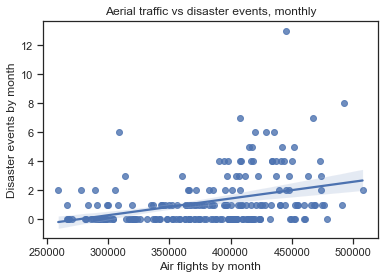

[[1.         0.36496394]
 [0.36496394 1.        ]]


In [203]:
sns.regplot(x1, y1)
plt.xlabel('Air flights by month')
plt.ylabel('Disaster events by month')
plt.title('Aerial traffic vs disaster events, monthly')
plt.show()

r1 = np.corrcoef(x1,y1)
print(r1)

# We can see that, contrary to expectations, the number of flights is increasing with the number of disaster appening.
# The correlation coefficient is weak (~0.365).
# Maybe we are dealing with a cofonding effect (e.g. economic growth).

In [204]:
# Verification of the relation between the total aerial traffic monthly (x) and the total of disaster monthly,
# for each province and territory.
x2 = merged_df.groupby(['date', 'prov_ter'])['VALUE'].agg('sum')
y2 = merged_df.groupby(['date', 'prov_ter'])['sum_events'].agg('sum')
print(x2.shape, y2.shape)

(2365,) (2365,)


C:\Users\laurence\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


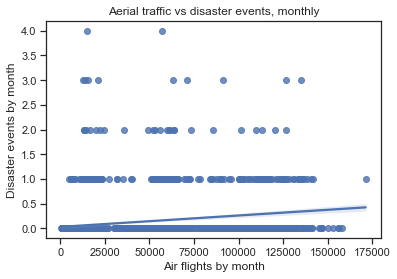

[[1.         0.22619858]
 [0.22619858 1.        ]]


In [205]:
sns.regplot(x2, y2)
plt.xlabel('Air flights by month')
plt.ylabel('Disaster events by month')
plt.title('Aerial traffic vs disaster events, monthly')
plt.show()

r2 = np.corrcoef(x2,y2)
print(r2)

# We can see now that the relation is not as clear, and that the regression does not honor data.
# Even with a correlation coefficient of ~0., with can see that most data do not follow the regression.

### Conclusion

In [206]:
# Saving data
merged_df.to_csv('merged_df.csv', index=False)